### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [107]:
data.isnull().sum()
#   car                     12576       
#   Bar                       107
#   CoffeeHouse               217
#   CarryAway                 151
#   RestaurantLessThan20      130
#   Restaurant20To50          189

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [4]:
# Rows should not be thrown out of the master data table based on a missing column value,
# because that row may still be relevant to an inquiry dependent upon non-missing data.
#   car                     12576       
#   Bar                       107
#   CoffeeHouse               217
#   CarryAway                 151
#   RestaurantLessThan20      130
#   Restaurant20To50          189

nulls = data.isnull()[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']]
all_null = nulls[(nulls['Bar'] == True) & (nulls['CoffeeHouse'] == True) & (nulls['CarryAway'] == True) & (nulls['RestaurantLessThan20'] == True) & (nulls['Restaurant20To50'] == True)]
all_null.shape      # 42
# There is strong overlap between missing columns. Therefore, if they are all dropped, the loss of data will be mild.



(42, 5)

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# Less than 1% of rows include a car, so that information will not add value. Drop it.
# The remaining missing data is proportionately small, so drop them.

data_filt = data.drop(columns='car').dropna()
print(f"Dropped {data.shape[0] - data_filt.shape[0]} rows, kept {data_filt.shape[0]} rows.")

Dropped 605 rows, kept 12079 rows.


4. What proportion of the total observations chose to accept the coupon?



In [9]:
acceptance_total = data_filt.Y.mean()
print(f"Proportion of total coupons accepted: {round(acceptance_total, 3)}.")

Proportion of total coupons accepted: 0.569.


5. Use a bar plot to visualize the `coupon` column.

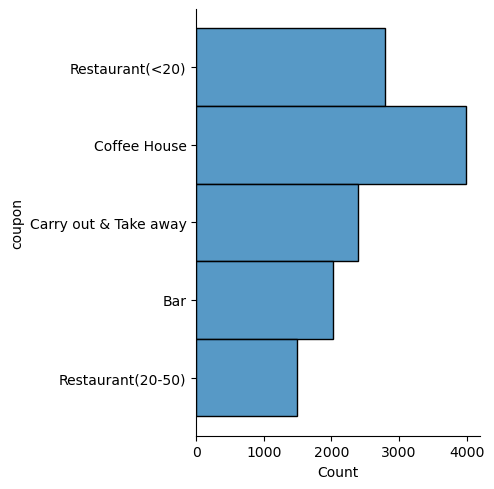

In [7]:
# Use unfiltered data, since coupon had no holes

#sns.barplot(data, y='coupon')  # Fail. Only shows 2 classes.
sns.displot(data, y='coupon')
#px.bar(data, x='coupon')       # Less concise.

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

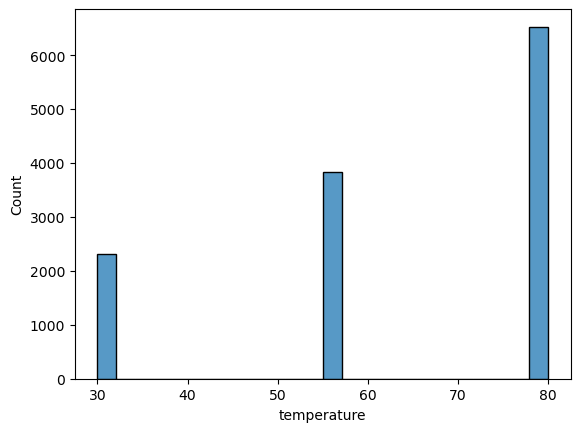

In [58]:
sns.histplot(data.temperature)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [102]:
bar_df = data_filt.loc[data.coupon == 'Bar']


2. What proportion of bar coupons were accepted?


In [103]:
bar_acceptance = bar_df.Y.mean()
print(f"Proportion of bar coupons accepted: {round(bar_acceptance, 3)}")

Proportion of bar coupons accepted: 0.412


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [121]:
le3 = ['never', 'less1', '1~3']
bar_acceptance_lt4 = bar_df[bar_df['Bar'].isin(le3)].Y.mean()
bar_acceptance_ge4 = bar_df[~bar_df['Bar'].isin(le3)].Y.mean()
print(f"Acceptance rate for those who went to a bar 4+ times/mo is {round(bar_acceptance_ge4 / bar_acceptance_lt4, 3)} times higher than for those who went less often.")

Acceptance rate for those who went to a bar 4+ times/mo is 2.044 times higher than for those who went less often.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [143]:
bar_lt1 = ['never', 'less1']
age_le25 = ['below21', '21']
#bar_df['age'].unique()      # ['21', '46', '26', '31', '41', '50plus', '36', 'below21']
bar_ge1_and_age_gt25 = bar_df[
    (~bar_df['Bar'].isin(bar_lt1)) & 
    (~bar_df['age'].isin(age_le25))
    ]
bar_ge1_and_age_gt25
all_others = bar_df.drop(bar_ge1_and_age_gt25.index)

rate_A = round(bar_ge1_and_age_gt25.Y.mean(), 3)
rate_B = round(all_others.Y.mean(), 3)
print(f"Drivers who go to a bar more than once a month and are over the age of 25 accept a coupon at a rate of {rate_A}\n"
      f"while all others accept a coupon at a rate of {rate_B}")
print(f"The former are {(rate_A / rate_B).__round__(2)} times more likely to accept the coupon. Big difference!")

Drivers who go to a bar more than once a month and are over the age of 25 accept a coupon at a rate of 0.69
while all others accept a coupon at a rate of 0.338
The former are 2.04 times more likely to accept the coupon. Big difference!


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [199]:
bar_lt1 = ['never', 'less1']

occupation = ['Farming Fishing & Forestry']
select = bar_df.loc[
    (~bar_df['Bar'].isin(bar_lt1)) &
    (~bar_df['passanger'].isin(['Kid(s)'])) &
    (~bar_df['occupation'].isin(occupation))
    , 'Y']
select_rate = select.mean()
other_rate = bar_df.drop(select.index).Y.mean()

print(f"Drivers who go to a bar more than once per month, and had an adult passenger, and weren't in farming, fishing, nor forestry, \n"
      f"accepted bar coupons at a rate of {select_rate.__round__(3)} compared to everyone else at a rate of {other_rate.__round__(3)}.")
print(f"The former are {(select_rate / other_rate).__round__(2)} times more likely to accept the coupon. Big difference!")


Drivers who go to a bar more than once per month, and had an adult passenger, and weren't in farming, fishing, nor forestry, 
accepted bar coupons at a rate of 0.709 compared to everyone else at a rate of 0.298.
The former are 2.38 times more likely to accept the coupon. Big difference!


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [198]:
ge4 = ['4~8', 'gt8']
lt50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
select = bar_df.loc[
    ~bar_df.RestaurantLessThan20.isin(ge4) &
    bar_df.income.isin(lt50k)
    , 'Y']
select_rate = select.mean()
other_rate = bar_df.drop(select.index).Y.mean()

print(f"Drivers who go to a cheap restaurant more than four times per month, and have an income less than $50k \n"
      f"accepted bar coupons at a rate of {select_rate.__round__(3)} compared to everyone else at a rate of {other_rate.__round__(3)}.")
print("Almost no difference.")

Drivers who go to a cheap restaurant more than four times per month, and have an income less than $50k 
accepted bar coupons at a rate of 0.405 compared to everyone else at a rate of 0.415.
Almost no difference.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Visualize the relationship betewen acceptance and some other data columns ...

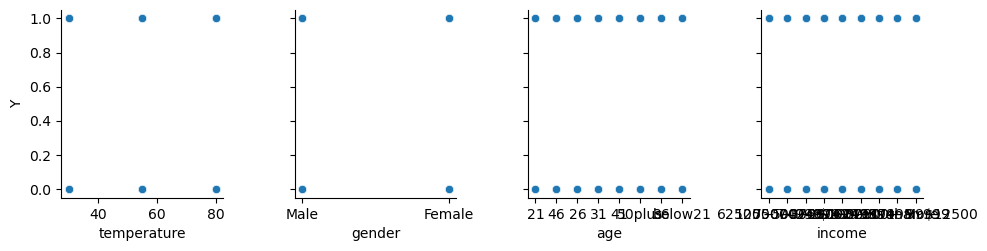

In [ ]:
# First attempt at a Pair Plot.
sns.pairplot(data_filt, y_vars='Y', x_vars=['temperature', 'gender', 'age', 'income'])

# Conclusion: since the data is quantized, the simple Pair Plot doesn't yield useful information.
# The dots would have to be sized in proportion to the number of hits, but size isn't an argument of pairplot.
# Maybe that can be accomplished by a groupby operation.

In [ ]:
location_cols = ['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']
yes_sums = data_filt[location_cols].groupby('Y').sum()
yes_sums_norm = yes_sums / data_filt.shape[0]
yes_sums_norm.reset_index()
yes_sums_norm
#plt.figure(figsize=(12,5))
#sns.barplot(yes_sums_norm)             # Only renders half the data
#sns.barplot(yes_sums_norm, hue='Y')    # Error: hue cannot be assigned with wide-form data ???
fig = px.bar(yes_sums_norm, barmode='group', width=800)
fig.update_layout(title_text="Distance and Direction grouped by Acceptance")


Conclusions from Distance and Direction grouped by Acceptance:
* Given a coupon was accepted, ~57% of them were more than 5 minutes away, ~30% were more than 15 minutes away, and only 5% were more than 25 minutes away.
    * 100% - 57% = 43% of accepted coupons were within 5 miles away.
    * 57% - 30% = 27% of accepted coupons were 5 to 15 miles away.
    * 30% - 5% = 25% of accepted coupons were 15 to 25 miles away.
* It's difficult to read much useful information from a group by acceptance. See Independent Investigation Step 3 for more informative grouping.

Text(0.5, 1.0, 'Number of coupons accepted by type')

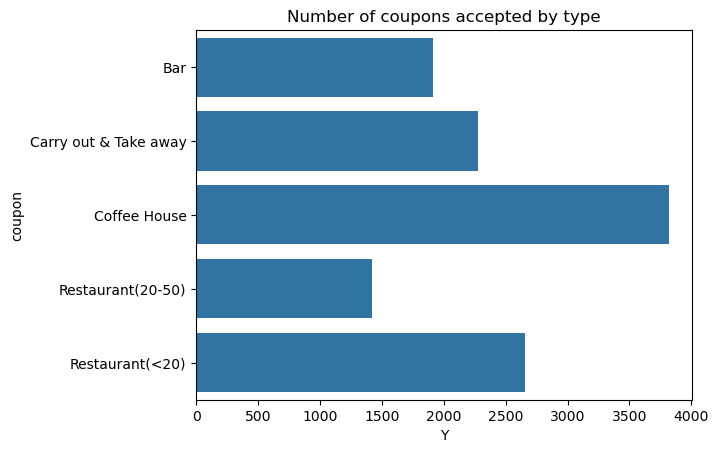

In [ ]:
x = data_filt[['coupon', 'Y']].groupby('coupon').count()
sns.barplot(data=x, y='coupon', x='Y')
plt.title('Number of Coupons Accepted by Type')

2. Is a driver with kids in the car more likely to accept a coupon for take-out or dine-in to an expensive restaurant?

In [239]:
with_kids_df = data_filt.query("passanger == 'Kid(s)'")
with_kids_take_out_rate = with_kids_df.query("coupon == 'Carry out & Take away'").Y.mean()
with_kids_costly_dine_in_rate = with_kids_df[with_kids_df.coupon.isin(['Restaurant(20-50)'])].Y.mean()

print(f"For drivers with child passengers, the acceptance rate for take-out coupons was {with_kids_take_out_rate.__round__(3)},\n"
      f"compared to the acceptance rate for expensive dine-in coupons of {with_kids_costly_dine_in_rate.__round__(3)}.\n"
      f"Those drivers were {(with_kids_take_out_rate/with_kids_costly_dine_in_rate).__round__(2)} times more likely to accept a take-out coupon.")


For drivers with child passengers, the acceptance rate for take-out coupons was 0.697,
compared to the acceptance rate for expensive dine-in coupons of 0.369.
Those drivers were 1.89 times more likely to accept a take-out coupon.


3. Coupons to a fancy restaurant by income and time of day.

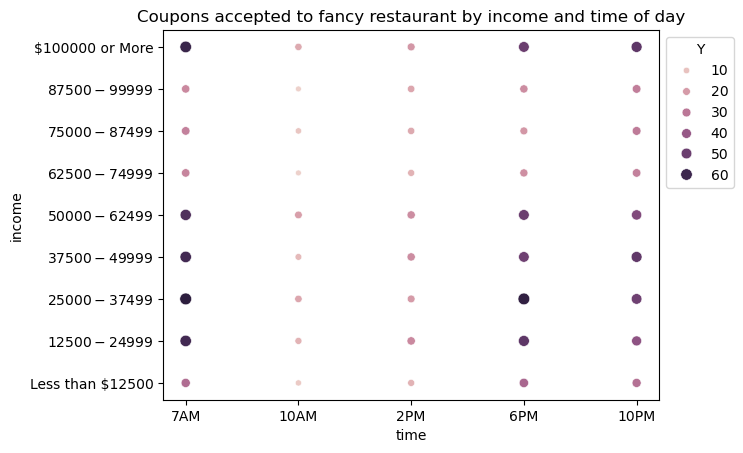

In [106]:
expensive_food_df = data_filt.query('coupon == "Restaurant(20-50)"')
expensive_food_counts = expensive_food_df.groupby(['income', 'time'])[['Y']].count()
expensive_food_counts.reset_index(inplace=True)

# Impose an order on the income and time columns
income_cat = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999',
    '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']
time_cat = ['7AM', '10AM', '2PM', '6PM', '10PM']
expensive_food_counts['income'] = pd.Categorical(expensive_food_counts['income'], categories=income_cat, ordered=True)
expensive_food_counts['time'] = pd.Categorical(expensive_food_counts['time'], categories=time_cat, ordered=True)

ax = sns.scatterplot(expensive_food_counts, y='income', x='time', size='Y', hue='Y', legend='auto')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Coupons accepted to fancy restaurant by income and time of day')
ax.invert_yaxis()


Conclusion regarding coupons accepted to fancy restaurant by income and time of day:
* There's much more coupon acceptance during breakfast, dinner, and late night.
* There is more coupon acceptance by the wealthy (over $100k) and the lower-middle class brackets, and less by the upper-middle class brackets and the bracket below $12.5k.
    * The large numbers of acceptance by wealthy may owe to sample bias: more respondents in that open-ended category than in the narrower ones.
* The upper-middle class doesn't seem to use as many coupons.